<a href="https://colab.research.google.com/github/i40-Tools/I40KG-Embeddings/blob/master/Community-Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I40 standards landscape similarity analysis using embeddings

## Overview

In this notebook, we show the similarity analysis between Industry 4.0 Standards. 
To do so, we create embeddings about the Industry 4.0 Standards Knowledge Graph (I40KG) developed by [Grangel-Gonzales et. al.](https://www.researchgate.net/publication/318208930_The_Industry_40_Standards_Landscape_from_a_Semantic_Integration_Perspective)

The embeddings are located here: [I40 Embeddings](https://github.com/i40-Tools/I40KG-Embeddings/tree/master/logs_sto)

In [1]:
import scipy
import numpy as np
import pandas as pd
import json
from sklearn.metrics.pairwise import cosine_similarity

### In this section we show the analysis of similarity among standards belonging to the same framework

In [2]:
import json
from rdflib import Graph
SIMETRIC_MATRIX_FILE = "simetric_matrix.tsv"
ENTITIES_FILE = "entities.txt"
list_sim = []
output='result/TransR/'

g = Graph()
g.parse("sto/sto-enriched.nt", format="nt")
    
len(g) # prints 2
    
qres = g.query(
    """PREFIX owl: <http://www.w3.org/2002/07/owl#>
       PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
       PREFIX sto: <https://w3id.org/i40/sto#>
    
    select ?s where {
            ?s rdf:type sto:Standard .
    } limit 1000""")

        
#with open("embeddings/TransE/entities_to_embeddings.json",'rb') as f:
with open("embeddings/TransR/sto-enriched/entities_to_embeddings.json",'rb') as f:
    array = json.load(f)
new_dict = {}
for row in qres:
    for key,value in array.items():
        if key == "%s" % row:
            tem = key
            #print(key)
            new_dict[tem] = array[key]


with open('output_standard_same_framework.json','w') as f:
    # this would place the entire output on one line
    # use json.dump(lista_items, f, indent=4) to "pretty-print" with four spaces per indent
    json.dump(new_dict, f) 

    
#to read the file containing standards/frameworks along with their embeddings   
with open('output_standard_same_framework.json', 'r') as f:
    array = json.load(f)

### Create standard/framework list

In [3]:
list_n = [*array]
entities = "\n".join(str(x) for x in list_n)
n_ent = str(len(list_n))
entity = open(output+'semep/'+ENTITIES_FILE, mode="w+")
entity.write(n_ent+"\n"+entities)
entity.close()
print(len([*array]))

322


### Compare each standard/framework with all the other standards/frameworks to build cosine similarity matrix

In [4]:
result = {}
s=n_ent+"\n"
cosine_matrix = pd.DataFrame(index=list(array.keys()), columns=list(array.keys()))
cosine_matrix = cosine_matrix.fillna(0.0)
for key,value in array.items():
    for keyC,valueC in array.items():
        sim = abs(1-scipy.spatial.distance.cosine(value,valueC)) #send the values of the standards/frameworks to cosine similarity function
        sim = round(sim, 5)
        list_sim.append(sim)
        cosine_matrix.at[key, keyC] = sim

threshold = np.percentile(list_sim, 95)
print("percentil", threshold)
for col in cosine_matrix.columns:
    cosine_matrix.loc[cosine_matrix[col] < threshold, [col]] = 0
cosine_matrix.head()

percentil 0.28547


,https://w3id.org/i40/sto#ISO_15531-4x,https://w3id.org/i40/sto#ISO_29190,https://w3id.org/i40/sto#IEC_60364,https://w3id.org/i40/sto#IEC_42010,https://w3id.org/i40/sto#IEC_60870_P5_S1_E1,https://w3id.org/i40/sto#IEC_61850_P7_S4_E2,https://w3id.org/i40/sto#IEC_61334_P4_S512_E1,https://w3id.org/i40/sto#IEC_29182_P1,https://w3id.org/i40/sto#ISO_22745-11,https://w3id.org/i40/sto#ISO_13849,...,https://w3id.org/i40/sto#IEC_61850_P4_E1,https://w3id.org/i40/sto#IEC_15459,https://w3id.org/i40/sto#IEC_60027_P6_E1,https://w3id.org/i40/sto#IEC_62443,https://w3id.org/i40/sto#IEC_62264,https://w3id.org/i40/sto#IEC_61690_P2_E1,https://w3id.org/i40/sto#IEC_60870_P2_S2_E1,https://w3id.org/i40/sto#IEC_61334_P4_S1_E1,https://w3id.org/i40/sto#IEC_61968_P6_E1,https://w3id.org/i40/sto#ISO_15746
https://w3id.org/i40/sto#ISO_15531-4x,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.29627,0.0,0.0,0.0,0.0
https://w3id.org/i40/sto#ISO_29190,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
https://w3id.org/i40/sto#IEC_60364,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
https://w3id.org/i40/sto#IEC_42010,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
https://w3id.org/i40/sto#IEC_60870_P5_S1_E1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0


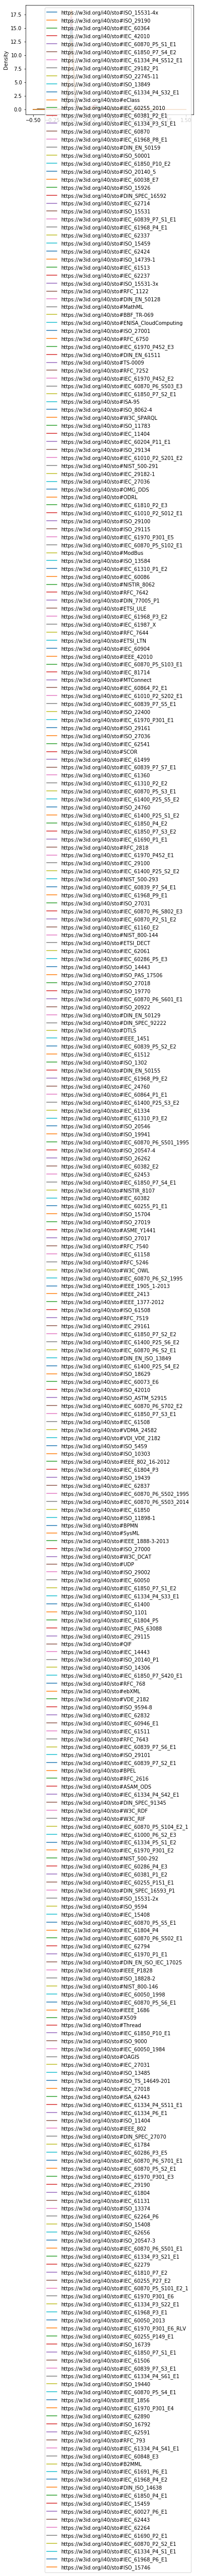

In [7]:
cosine_matrix.plot.kde()

In [720]:
f = open(output+'matrix_undirected_cosine.tsv', mode="w+")
f.write(str(cosine_matrix.shape[0])+"\n")
f.close()

In [721]:
cosine_matrix.shape

(322, 322)

### Save cosine similarity matrix with the structure SemEP need

In [722]:
f = open(output+'semep/'+'matrix_undirected_cosine.tsv', mode="w+")
f.write(str(cosine_matrix.shape[0])+"\n")
f.close()
cosine_matrix.to_csv(output+'semep/'+'matrix_undirected_cosine.tsv', mode='a', sep=' ',
                     index=False, header=False, float_format='%.5f')

In [ ]:
# Run SemEP from Doker (https://hub.docker.com/r/kemele/semepnode) OR (https://github.com/SDM-TIB/SemEP-Node)
#!sudo docker run -it --rm -v /media/rivas/Data1/Data-mining/KCAP-I40KG-Embeddings/I40KG-Embeddings/result/semep:/data kemele/semepnode:23-05-2018 semEP-node entities.txt matrix_undirected_cosine.tsv 0.2386

In [723]:
num_cls = 34

### METIS Undirected MAX based similarity graph file

In [724]:
metislines = []
nodes = {"name":[], "id":[]}
kv = 1
edges = 0
for i, row in cosine_matrix.iterrows():
    val = ""
    ix = 1
    ledges = 0
    found = False
    for k in row.keys():
        if i != k and row[k] > 0:
            val += str(ix) + " " + str(int(row[k] * 100000)) + " "
            # Only one edge is counted between two nodes, i.e., (u,v) and (v, u) edges are counted as one
            # Self links are also ignored, Notive ix>kv
            #if ix > kv:
            ledges += 1
            found = True
        ix += 1
    if found:
        # This node is connected
        metislines.append(val.strip())
        edges += ledges
        nodes["name"].append(i)
        nodes['id'].append(str(kv))
    else:
        # disconnected RDF-MTs are given 10^6 value as similarity value
        metislines.append(str(kv) + " 100000")
        edges += 1
    
    kv += 1    
nodes = pd.DataFrame(nodes)
print(edges)
nodes.head()

4864


,name,id
0,https://w3id.org/i40/sto#IEC_62279,1
1,https://w3id.org/i40/sto#IEC_61506,2
2,https://w3id.org/i40/sto#IEEE_1888-3-2013,3
3,https://w3id.org/i40/sto#IEC_61310_P3_E2,4
4,https://w3id.org/i40/sto#ISO_9594,5


In [725]:
numedges = edges//2
numedges

2432

### Save filemetis.graph to execute METIS algorithm

In [726]:
#!mkdir result/metis
ff = open(output+'metis/metis.graph', 'w+')
ff.write(str(cosine_matrix.shape[0])+" "+ str(numedges) + " 001\n")
met = [m.strip() + "\n" for m in metislines]
ff.writelines(met)
ff.close()

In [14]:
#nodes.to_csv(output+'metis/METIS_NODE-CODES.tsv', sep='\t', index=False)

In [ ]:
#Run METIS from Doker: https://hub.docker.com/r/kemele/metis
#!sudo docker run -it --rm -v /media/rivas/Data1/Data-mining/KCAP-I40KG-Embeddings/I40KG-Embeddings/result/metis:/data kemele/metis:5.1.0 gpmetis metis.graph 10

### Read results standards of 10 Partitions by METIS algorithm

In [727]:
parts = open(output+'metis/metis.graph.part.'+str(num_cls)).readlines()
parts = [p.strip() for p in parts]
print(parts)
len(parts)

['4', '8', '26', '12', '15', '26', '11', '6', '1', '1', '11', '15', '30', '23', '3', '23', '9', '10', '25', '20', '27', '19', '24', '26', '24', '10', '7', '28', '5', '14', '21', '17', '1', '18', '17', '0', '21', '33', '32', '8', '23', '12', '24', '29', '0', '6', '31', '2', '25', '30', '20', '2', '3', '20', '16', '28', '24', '10', '16', '6', '31', '21', '27', '4', '33', '17', '32', '23', '2', '32', '1', '32', '0', '1', '13', '26', '32', '30', '6', '15', '10', '25', '8', '13', '2', '10', '24', '7', '5', '26', '25', '7', '28', '29', '5', '10', '17', '33', '11', '18', '5', '11', '26', '20', '12', '31', '7', '26', '14', '2', '23', '22', '24', '21', '16', '6', '3', '28', '3', '10', '4', '20', '20', '18', '4', '33', '21', '19', '32', '25', '22', '6', '19', '29', '21', '30', '25', '23', '15', '26', '20', '7', '22', '13', '32', '26', '17', '4', '9', '9', '10', '14', '13', '15', '3', '23', '28', '20', '28', '28', '0', '8', '3', '26', '29', '3', '30', '27', '22', '22', '27', '17', '9', '21', '31'

322

### Save each partition standads into a file

In [728]:
i = 0
#partitions = {"0":[], "1":[], "2":[], "3":[], "4":[], "5":[], "6":[], "7":[], "8":[], "9":[], "10":[], "11":[], "12":[], "13":[], "14":[], "15":[], "16":[], "17":[]}
partitions = dict((str(k), []) for k in range(num_cls))
for p in parts:
    name = nodes.iat[i, 0]
    i +=1
    partitions[str(p)].append(name)
    
#f = open(output+'metis/metis_10_standards.graph.json', "w+")
#json.dump(partitions, f)
#f.close()
partitions

{'0': ['https://w3id.org/i40/sto#IEC_61850_P7_S3_E2',
  'https://w3id.org/i40/sto#IEC_61968_P9_E2',
  'https://w3id.org/i40/sto#IEEE_1905_1-2013',
  'https://w3id.org/i40/sto#ISO_20140_5',
  'https://w3id.org/i40/sto#ISO_61508',
  'https://w3id.org/i40/sto#IEEE_1686',
  'https://w3id.org/i40/sto#IEC_61970_P301_E6',
  'https://w3id.org/i40/sto#IEC_61810_P7_E2',
  'https://w3id.org/i40/sto#B2MML',
  'https://w3id.org/i40/sto#ISO_19770'],
 '1': ['https://w3id.org/i40/sto#DIN_EN_50155',
  'https://w3id.org/i40/sto#DIN_SPEC_92222',
  'https://w3id.org/i40/sto#IEC_61970_P1_E1',
  'https://w3id.org/i40/sto#IEC_61508',
  'https://w3id.org/i40/sto#IEC_29182_P1',
  'https://w3id.org/i40/sto#ISO_PAS_17506',
  'https://w3id.org/i40/sto#ISO_29002',
  'https://w3id.org/i40/sto#IEC_60870_P6_S702_E2',
  'https://w3id.org/i40/sto#IEC_61512'],
 '2': ['https://w3id.org/i40/sto#ISO_27000',
  'https://w3id.org/i40/sto#ModBus',
  'https://w3id.org/i40/sto#BBF_TR-069',
  'https://w3id.org/i40/sto#ISO_15459',

In [729]:
i = 0
count = 0
#!mkdir result/metis/clusters
for p in partitions:
    if len(partitions[p]) == 0:
        continue
    count += len(partitions[p])
    f = open(output+'metis/clusters/standards-part' + str(i) + '.txt', 'w+')
    [f.write(l+'\n') for l in partitions[p]]
    f.close()
    i+=1
print(count)

322


## K-means Analyse 

In [296]:
vectors = []
for key,value in array.items():
    vectors.append(value)
X = np.array(vectors)

In [297]:
X[0]

array([-2.07878128e-02, -5.12513891e-03,  7.18675274e-03,  7.17117079e-03,
        2.49607470e-02, -5.63039037e-04, -3.27911414e-03,  9.92630329e-03,
       -1.91225705e-03, -4.79801046e-03,  1.51107844e-03, -2.24241894e-02,
        3.51092368e-02, -1.02881379e-02, -2.49145385e-02,  2.95755118e-02,
       -6.82071317e-03, -1.73230208e-02, -6.41942909e-03, -1.33238519e-02,
        5.90326708e-05,  2.20928639e-02,  3.08328122e-03, -7.67077832e-03,
        7.46996049e-03, -2.00173003e-03,  1.74816474e-02,  1.21248635e-02,
        1.36406040e-02, -5.00010028e-02, -8.57670419e-03,  2.45806724e-02,
       -3.53657342e-02, -5.06698107e-03, -1.24530382e-02, -9.82217863e-03,
        4.03655618e-02,  8.63585435e-03, -3.34013849e-02,  4.48265905e-03,
        2.59126965e-02, -1.65779684e-02, -1.39863668e-02,  3.04871686e-02,
       -3.61500820e-03,  3.12588410e-03,  8.82785860e-03,  6.43522386e-03,
        5.00715226e-02, -3.53124812e-02])

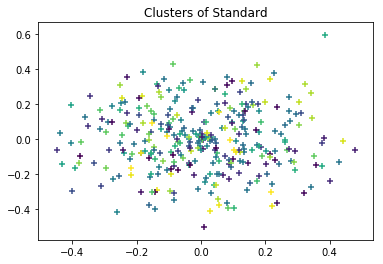

In [730]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(X)
pca_c = pca.transform(X)
#kmeans = KMeans(n_clusters=7, random_state=0).fit(X)
kmeans = KMeans(n_clusters=num_cls, random_state=0).fit(cosine_matrix)

plt.scatter(pca_c[:, 0], pca_c[:, 1], c=kmeans.labels_, marker='+')
plt.title("Clusters of Standard")

plt.show()

### Number of standard by clsuter

In [731]:
pd.value_counts(kmeans.labels_, 0)

0      8
1     13
2      8
3     10
4      7
5     13
6      7
7      8
8      6
9      7
10     6
11     9
12     9
13    56
14    10
15     9
16     9
17     2
18     8
19     7
20     9
21     9
22     9
23     4
24     7
25    11
26     7
27     9
28    10
29     6
30     7
31     8
32     8
33     6
dtype: int64

### Save each partition standads into a file

In [732]:
list_cluster = pd.DataFrame()
list_cluster.insert(0, 'standards', list_n)
list_cluster.insert(1, 'clusters', kmeans.labels_)
#list_cluster = list_cluster.sort_values(by=['clusters'], ascending=False)

In [733]:
list_cluster.head()

,standards,clusters
0,https://w3id.org/i40/sto#IEC_62279,3
1,https://w3id.org/i40/sto#IEC_61506,13
2,https://w3id.org/i40/sto#IEEE_1888-3-2013,13
3,https://w3id.org/i40/sto#IEC_61310_P3_E2,16
4,https://w3id.org/i40/sto#ISO_9594,13


In [734]:
#!mkdir result/Kmeans
#!mkdir result/Kmeans/cluster
cls_0 = list_cluster.loc[list_cluster['clusters'] == 0]
cls_1 = list_cluster.loc[list_cluster['clusters'] == 1]

cls_2 = list_cluster.loc[list_cluster['clusters'] == 2]
cls_3 = list_cluster.loc[list_cluster['clusters'] == 3]
cls_4 = list_cluster.loc[list_cluster['clusters'] == 4]
cls_5 = list_cluster.loc[list_cluster['clusters'] == 5]
cls_6 = list_cluster.loc[list_cluster['clusters'] == 6]
cls_7 = list_cluster.loc[list_cluster['clusters'] == 7]
cls_8 = list_cluster.loc[list_cluster['clusters'] == 8]
cls_9 = list_cluster.loc[list_cluster['clusters'] == 9]
cls_10 = list_cluster.loc[list_cluster['clusters'] == 10]
cls_11 = list_cluster.loc[list_cluster['clusters'] == 11]
cls_12 = list_cluster.loc[list_cluster['clusters'] == 12]
cls_13 = list_cluster.loc[list_cluster['clusters'] == 13]
cls_14 = list_cluster.loc[list_cluster['clusters'] == 14]
cls_15 = list_cluster.loc[list_cluster['clusters'] == 15]
cls_16 = list_cluster.loc[list_cluster['clusters'] == 16]
cls_17 = list_cluster.loc[list_cluster['clusters'] == 17]
cls_18 = list_cluster.loc[list_cluster['clusters'] == 18]
cls_19 = list_cluster.loc[list_cluster['clusters'] == 19]
cls_20 = list_cluster.loc[list_cluster['clusters'] == 20]
cls_21 = list_cluster.loc[list_cluster['clusters'] == 21]
cls_22 = list_cluster.loc[list_cluster['clusters'] == 22]
cls_23 = list_cluster.loc[list_cluster['clusters'] == 23]
cls_24 = list_cluster.loc[list_cluster['clusters'] == 24]
cls_25 = list_cluster.loc[list_cluster['clusters'] == 25]
cls_26 = list_cluster.loc[list_cluster['clusters'] == 26]
cls_27 = list_cluster.loc[list_cluster['clusters'] == 27]
cls_28 = list_cluster.loc[list_cluster['clusters'] == 28]
cls_29 = list_cluster.loc[list_cluster['clusters'] == 29]
cls_30 = list_cluster.loc[list_cluster['clusters'] == 30]
cls_31 = list_cluster.loc[list_cluster['clusters'] == 31]
cls_32 = list_cluster.loc[list_cluster['clusters'] == 32]
cls_33 = list_cluster.loc[list_cluster['clusters'] == 33]
"""
cls_34 = list_cluster.loc[list_cluster['clusters'] == 34]
cls_35 = list_cluster.loc[list_cluster['clusters'] == 35]
cls_36 = list_cluster.loc[list_cluster['clusters'] == 36]
cls_37 = list_cluster.loc[list_cluster['clusters'] == 37]
cls_38 = list_cluster.loc[list_cluster['clusters'] == 38]
cls_39 = list_cluster.loc[list_cluster['clusters'] == 39]
cls_40 = list_cluster.loc[list_cluster['clusters'] == 40]
"""

cls_0['standards'].to_csv(output+'Kmeans/clusters/cluster-0.txt', index=False)
cls_1['standards'].to_csv(output+'Kmeans/clusters/cluster-1.txt', index=False)

cls_2['standards'].to_csv(output+'Kmeans/clusters/cluster-2.txt', index=False)
cls_3['standards'].to_csv(output+'Kmeans/clusters/cluster-3.txt', index=False)
cls_4['standards'].to_csv(output+'Kmeans/clusters/cluster-4.txt', index=False)
cls_5['standards'].to_csv(output+'Kmeans/clusters/cluster-5.txt', index=False)
cls_6['standards'].to_csv(output+'Kmeans/clusters/cluster-6.txt', index=False)
cls_7['standards'].to_csv(output+'Kmeans/clusters/cluster-7.txt', index=False)
cls_8['standards'].to_csv(output+'Kmeans/clusters/cluster-8.txt', index=False)
cls_9['standards'].to_csv(output+'Kmeans/clusters/cluster-9.txt', index=False)
cls_10['standards'].to_csv(output+'Kmeans/clusters/cluster-10.txt', index=False)
cls_11['standards'].to_csv(output+'Kmeans/clusters/cluster-11.txt', index=False)
cls_12['standards'].to_csv(output+'Kmeans/clusters/cluster-12.txt', index=False)
cls_13['standards'].to_csv(output+'Kmeans/clusters/cluster-13.txt', index=False)
cls_14['standards'].to_csv(output+'Kmeans/clusters/cluster-14.txt', index=False)
cls_15['standards'].to_csv(output+'Kmeans/clusters/cluster-15.txt', index=False)
cls_16['standards'].to_csv(output+'Kmeans/clusters/cluster-16.txt', index=False)
cls_17['standards'].to_csv(output+'Kmeans/clusters/cluster-17.txt', index=False)
cls_18['standards'].to_csv(output+'Kmeans/clusters/cluster-18.txt', index=False)
cls_19['standards'].to_csv(output+'Kmeans/clusters/cluster-19.txt', index=False)
cls_20['standards'].to_csv(output+'Kmeans/clusters/cluster-20.txt', index=False)
cls_21['standards'].to_csv(output+'Kmeans/clusters/cluster-21.txt', index=False)
cls_22['standards'].to_csv(output+'Kmeans/clusters/cluster-22.txt', index=False)
cls_23['standards'].to_csv(output+'Kmeans/clusters/cluster-23.txt', index=False)
cls_24['standards'].to_csv(output+'Kmeans/clusters/cluster-24.txt', index=False)
cls_25['standards'].to_csv(output+'Kmeans/clusters/cluster-25.txt', index=False)
cls_26['standards'].to_csv(output+'Kmeans/clusters/cluster-26.txt', index=False)
cls_27['standards'].to_csv(output+'Kmeans/clusters/cluster-27.txt', index=False)
cls_28['standards'].to_csv(output+'Kmeans/clusters/cluster-28.txt', index=False)
cls_29['standards'].to_csv(output+'Kmeans/clusters/cluster-29.txt', index=False)
cls_30['standards'].to_csv(output+'Kmeans/clusters/cluster-30.txt', index=False)
cls_31['standards'].to_csv(output+'Kmeans/clusters/cluster-31.txt', index=False)
cls_32['standards'].to_csv(output+'Kmeans/clusters/cluster-32.txt', index=False)
cls_33['standards'].to_csv(output+'Kmeans/clusters/cluster-33.txt', index=False)
"""
cls_34['standards'].to_csv(output+'Kmeans/clusters/cluster-34.txt', index=False)
cls_35['standards'].to_csv(output+'Kmeans/clusters/cluster-35.txt', index=False)
cls_36['standards'].to_csv(output+'Kmeans/clusters/cluster-36.txt', index=False)
cls_37['standards'].to_csv(output+'Kmeans/clusters/cluster-37.txt', index=False)
cls_38['standards'].to_csv(output+'Kmeans/clusters/cluster-38.txt', index=False)
cls_39['standards'].to_csv(output+'Kmeans/clusters/cluster-39.txt', index=False)
cls_40['standards'].to_csv(output+'Kmeans/clusters/cluster-40.txt', index=False)
"""

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:48: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:52: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.t

"\ncls_34['standards'].to_csv(output+'Kmeans/clusters/cluster-34.txt', index=False)\ncls_35['standards'].to_csv(output+'Kmeans/clusters/cluster-35.txt', index=False)\ncls_36['standards'].to_csv(output+'Kmeans/clusters/cluster-36.txt', index=False)\ncls_37['standards'].to_csv(output+'Kmeans/clusters/cluster-37.txt', index=False)\ncls_38['standards'].to_csv(output+'Kmeans/clusters/cluster-38.txt', index=False)\ncls_39['standards'].to_csv(output+'Kmeans/clusters/cluster-39.txt', index=False)\ncls_40['standards'].to_csv(output+'Kmeans/clusters/cluster-40.txt', index=False)\n"

### Density plot of standard similarity

In [152]:
#i=0
similarity=[]
#standard_similarity = pd.DataFrame(columns=['std_1', 'std_2', 'similarity'])
for key,value in array.items():
    for keyC,valueC in array.items():
        if key != keyC:
            sim = abs(1-scipy.spatial.distance.cosine(value,valueC)) #send the values of the standards/frameworks to cosine similarity function
            similarity.append(sim)
            #standard_similarity.loc[i]=[key, keyC, sim]
            #i+=1
standard_similarity = pd.DataFrame()
standard_similarity.insert(0, 'similarity', similarity)

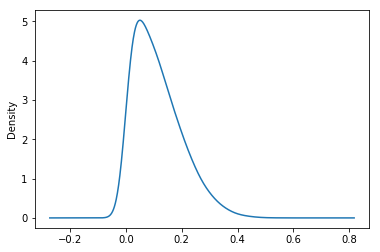

In [153]:
standard_similarity["similarity"].plot.kde(bw_method=0.3)

In [735]:
#Format required of the matrix to run clustering Measures
#!mkdir result/measures
cosine_matrix.to_csv(output+'measures/matrix_undirected_cosine.txt', mode='w+',
                     index=False, header=False, float_format='%.5f')
with open(output+'measures/'+ENTITIES_FILE, "w") as entity:
    entity.write(n_ent+"\n"+entities)

In [ ]:
#Run clustering Measures from: https://github.com/SDM-TIB/korona-graph-partitioning/tree/master/utils/clusteringMeasures
#!rivas@LXZ15265:/media/rivas/Data1/Data-mining/KCAP-I40KG-Embeddings/korona-graph-partitioning/utils/clusteringMeasures$ ./cma measures/clusters measures/entities.txt measures/matrix_undirected_cosine.txt

In [740]:
path = '../korona-graph-partitioning/utils/clusteringMeasures/'
cls_m = path + "output.txt"
measure = []
static = 16
n_metric = 5
cls_measures = pd.read_csv(cls_m, delimiter=",", header=None)
index_start = static + num_cls
index_end = index_start + n_metric
for pos in range(index_start, index_end):
    a = cls_measures.iloc[pos].to_string()
    b = a.split('\\t')[1]
    measure.append(float(b))
print(*[measure[0],measure[4], measure[3], measure[2], measure[1]], sep='\n')

0.799240179622
0.937777188166
648.53479
0.157666395429
0.205682829327


In [741]:
#Transform these three metric to (Inv. Conductance, Norm.Modularity and Inv.Norm.Total Cut) for each algorithm

#conductance = 0.705256059271
#modularity = 0.166783425861
#total_cut = 1012.587679999999
#max_cut = sum(list_sim)

max_cut = sum(cosine_matrix.sum(axis = 0, skipna = True))

measure[0] = 1.0 - measure[0]
measure[2] = (measure[2] + 0.5)/1.5
measure[3] = 1-(measure[3]/max_cut)
print(*[round(measure[0],3) ,round(measure[4],3), round(measure[3],3), round(measure[2],3), round(measure[1],3)], sep='\n')

0.201
0.938
0.668
0.438
0.206


### Cluster evaluation in terms of prediction metrics

In [742]:
# Set data

cls_evaluation_TransD_th_85 = pd.DataFrame({
'group': ['SemEP','Metis','Kmeans'],
'Inv. Conductance': [0.486, 0.595, 0.584],
'Inv. Performance': [0.483, 0.511, 0.510],
'Inv. Norm.Total Cut': [0.814, 0.816, 0.815],
'Norm.Modularity': [0.383, 0.402, 0.400],
'Coverage': [0.598, 0.603, 0.601]
})

cls_evaluation_TransE_th_85 = pd.DataFrame({
'group': ['SemEP','Metis','Kmeans'],
'Inv. Conductance': [0.343, 0.484, 0.364],
'Inv. Performance': [0.496, 0.663, 0.396],
'Inv. Norm.Total Cut': [0.810, 0.761, 0.846],
'Norm.Modularity': [0.383, 0.434, 0.397],
'Coverage': [0.591, 0.486, 0.668]
})

cls_evaluation_TransH_th_85 = pd.DataFrame({
'group': ['SemEP','Metis','Kmeans'],
'Inv. Conductance': [0.253, 0.302, 0.287],
'Inv. Performance': [0.819, 0.850, 0.713],
'Inv. Norm.Total Cut': [0.660, 0.681, 0.690],
'Norm.Modularity': [0.412, 0.457, 0.446],
'Coverage': [0.277, 0.322, 0.342]
})

cls_evaluation_TransR_th_85 = pd.DataFrame({
'group': ['SemEP','Metis','Kmeans'],
'Inv. Conductance': [0.464, 0.592, 0.569],
'Inv. Performance': [0.481, 0.512, 0.509],
'Inv. Norm.Total Cut': [0.812, 0.819, 0.816],
'Norm.Modularity': [0.377, 0.406, 0.400],
'Coverage': [0.596, 0.609, 0.604]
})
#==========================================================================
cls_evaluation_TransD_th_90 = pd.DataFrame({
'group': ['SemEP','Metis','Kmeans'],
'Inv. Conductance': [0.212, 0.312, 0.283],
'Inv. Performance': [0.830, 0.841, 0.747],
'Inv. Norm.Total Cut': [0.647, 0.691, 0.714],
'Norm.Modularity': [0.379, 0.447, 0.421],
'Coverage': [0.217, 0.313, 0.366]
})

cls_evaluation_TransE_th_90 = pd.DataFrame({
'group': ['SemEP','Metis','Kmeans'],
'Inv. Conductance': [0.203, 0.317, 0.295],
'Inv. Performance': [0.847, 0.860, 0.802],
'Inv. Norm.Total Cut': [0.641, 0.694, 0.698],
'Norm.Modularity': [0.384, 0.464, 0.445],
'Coverage': [0.206, 0.153, 0.333]
})

cls_evaluation_TransH_th_90 = pd.DataFrame({
'group': ['SemEP','Metis','Kmeans'],
'Inv. Conductance': [0.191, 0.215, 0.208],
'Inv. Performance': [0.911, 0.921, 0.892],
'Inv. Norm.Total Cut': [0.645, 0.643, 0.655],
'Norm.Modularity': [0.432, 0.442, 0.454],
'Coverage': [0.228, 0.224, 0.251]
})

cls_evaluation_TransR_th_90 = pd.DataFrame({
'group': ['SemEP','Metis','Kmeans'],
'Inv. Conductance': [0.199, 0.293, 0.258],
'Inv. Performance': [0.836, 0.858, 0.797],
'Inv. Norm.Total Cut': [0.647, 0.681, 0.690],
'Norm.Modularity': [0.384, 0.445, 0.423],
'Coverage': [0.217, 0.293, 0.314]
})
#======================================================================
cls_evaluation_TransD_th_95 = pd.DataFrame({
'group': ['SemEP','Metis','Kmeans'],
'Inv. Conductance': [0.128, 0.223, 0.190],
'Inv. Performance': [0.954, 0.961, 0.951],
'Inv. Norm.Total Cut': [0.642, 0.677, 0.665],
'Norm.Modularity': [0.403, 0.462, 0.439],
'Coverage': [0.139, 0.224, 0.195]
})

cls_evaluation_TransE_th_95 = pd.DataFrame({
'group': ['SemEP','Metis','Kmeans'],
'Inv. Conductance': [0.146, 0.099, 0.199],
'Inv. Performance': [0.958, 0.958, 0.938],
'Inv. Norm.Total Cut': [0.643, 0.624, 0.671],
'Norm.Modularity': [0.411, 0.383, 0.446],
'Coverage': [0.148, 0.103, 0.214]
})

cls_evaluation_TransH_th_95 = pd.DataFrame({
'group': ['SemEP','Metis','Kmeans'],
'Inv. Conductance': [0.267, 0.172, 0.185],
'Inv. Performance': [0.957, 0.964, 0.856],
'Inv. Norm.Total Cut': [0.685, 0.640, 0.698],
'Norm.Modularity': [0.472, 0.423, 0.480],
'Coverage': [0.269, 0.166, 0.298]
})

cls_evaluation_TransR_th_95 = pd.DataFrame({
'group': ['SemEP','Metis','Kmeans'],
'Inv. Conductance': [0.124, 0.086, 0.201],
'Inv. Performance': [0.956, 0.956, 0.938],
'Inv. Norm.Total Cut': [0.638, 0.618, 0.668],
'Norm.Modularity': [0.401, 0.370, 0.438],
'Coverage': [0.133, 0.084, 0.206]
})

## Evaluation in term of threshold

In [422]:
# Set data

cls_evaluation_th_85 = pd.DataFrame({
'group': ['SemEP','Metis','Kmeans'],
'Inv. Conductance': [0.486, 0.595, 0.584],
'Inv. Performance': [0.483, 0.511, 0.510],
'Inv. Norm.Total Cut': [0.814, 0.816, 0.815],
'Norm.Modularity': [0.383, 0.402, 0.400],
'Coverage': [0.598, 0.603, 0.601]
})

cls_evaluation_th_90 = pd.DataFrame({
'group': ['SemEP','Metis','Kmeans'],
'Inv. Conductance': [0.212, 0.312, 0.283],
'Inv. Performance': [0.830, 0.841, 0.747],
'Inv. Norm.Total Cut': [0.647, 0.691, 0.714],
'Norm.Modularity': [0.379, 0.447, 0.421],
'Coverage': [0.217, 0.313, 0.366]
})

cls_evaluation_th_95 = pd.DataFrame({
'group': ['SemEP','Metis','Kmeans'],
'Inv. Conductance': [0.128, 0.223, 0.190],
'Inv. Performance': [0.954, 0.961, 0.951],
'Inv. Norm.Total Cut': [0.642, 0.677, 0.665],
'Norm.Modularity': [0.403, 0.462, 0.439],
'Coverage': [0.139, 0.224, 0.195]
})

In [897]:
def radar_plot(nrows, ncols, index, df):
    # Libraries
    import matplotlib.pyplot as plt
    from math import pi

    # ------- PART 1: Create background

    # number of variable
    categories=list(df)[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(nrows, ncols, index, polar=True)

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    #plt.xticks(angles[:-1], categories, fontsize=7, rotation=40)
    plt.xticks(angles[:-1], categories, fontsize=10, rotation=40)
    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([0, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.9], ['0','0.2', '0.3','0.4', '0.5', '0.6', '0.7', '0.9'],
               color="grey", size=5)
    plt.ylim(0,1.0)

    for label, angle in zip(ax.get_xticklabels(), angles):
        if angle in (0, np.pi):
            label.set_horizontalalignment('center')
        elif 0 < angle < np.pi:
            label.set_horizontalalignment('left')
        else:
            label.set_horizontalalignment('right')

    # ------- PART 2: Add plots

    # Plot each individual = each line of the data
    # I don't do a loop, because plotting more than 3 groups makes the chart unreadable

    # Algorithm3
    values=df.loc[2].drop('group').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=2, linestyle='solid', label="Kmeans")
    ax.fill(angles, values, 'r', alpha=0.1)

    # Algorithm2
    values=df.loc[1].drop('group').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=2, linestyle='solid', label="Metis")
    ax.fill(angles, values, 'r', alpha=0.1)
    
    # Algorithm1
    values=df.loc[0].drop('group').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=2, linestyle='solid', label="SemEP")
    ax.fill(angles, values, 'r', alpha=0.1)
    

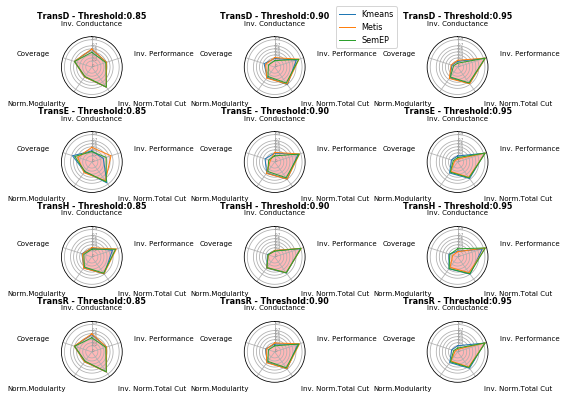

In [856]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# plot with various axes scales
plt.figure(1) #figsize=(20, 10)

# TransD
radar_plot(4, 3, 1,cls_evaluation_TransD_th_85)
plt.title('TransD - Threshold:0.85', y=1.2, fontsize=8, weight='bold')

# TransD
radar_plot(4, 3, 2,cls_evaluation_TransD_th_90)
plt.title('TransD - Threshold:0.90', y=1.2, fontsize=8, weight='bold')

# TransD
radar_plot(4, 3, 3,cls_evaluation_TransD_th_95)
plt.title('TransD - Threshold:0.95', y=1.2, fontsize=8, weight='bold')

# TransE
radar_plot(4, 3, 4,cls_evaluation_TransE_th_85)
plt.title('TransE - Threshold:0.85', y=1.2, fontsize=8, weight='bold')

# TransE
radar_plot(4, 3, 5,cls_evaluation_TransE_th_90)
plt.title('TransE - Threshold:0.90', y=1.2, fontsize=8, weight='bold')

# TransE
radar_plot(4, 3, 6,cls_evaluation_TransE_th_95)
plt.title('TransE - Threshold:0.95', y=1.2, fontsize=8, weight='bold')

# TransH
radar_plot(4, 3, 7,cls_evaluation_TransH_th_85)
plt.title('TransH - Threshold:0.85', y=1.2, fontsize=8, weight='bold')

# TransH
radar_plot(4, 3, 8,cls_evaluation_TransH_th_90)
plt.title('TransH - Threshold:0.90', y=1.2, fontsize=8, weight='bold')

# TransH
radar_plot(4, 3, 9,cls_evaluation_TransH_th_95)
plt.title('TransH - Threshold:0.95', y=1.2, fontsize=8, weight='bold')

# TransR
radar_plot(4,3,10,cls_evaluation_TransR_th_85)
plt.title('TransR - Threshold:0.85', y=1.2, fontsize=8, weight='bold')

# TransR
radar_plot(4,3,11,cls_evaluation_TransR_th_90)
plt.title('TransR - Threshold:0.90', y=1.2, fontsize=8, weight='bold')

# TransR
radar_plot(4,3,12,cls_evaluation_TransR_th_95)
plt.title('TransR - Threshold:0.95', y=1.2, fontsize=8, weight='bold')

# Format the minor tick labels of the y-axis into empty strings with
# `NullFormatter`, to avoid cumbering the axis with too many labels.
#plt.gca().yaxis.set_minor_formatter(NullFormatter())
# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
plt.subplots_adjust(top=1.2, bottom=0.0, left=0.0, right=1.27, hspace=0.56,
                    wspace=0)
plt.legend(loc = (-1.5, 5.5), ncol=1, fontsize=8)

plt.savefig("Measure of standards clusters based on Trans Family.pdf", format='pdf', bbox_inches = 'tight')
#plt.show()

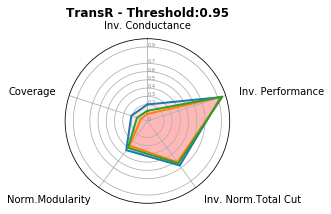

In [911]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# plot with various axes scales
plt.figure(1) #figsize=(20, 10)

# TransD
radar_plot(2,2,1,cls_evaluation_TransR_th_95)
plt.title('TransR - Threshold:0.95', y=1.1, fontsize=12, weight='bold')


plt.subplots_adjust(top=1.2, bottom=0.0, left=0.0, right=1.3, hspace=0.10,
                    wspace=0.1)
#plt.legend(loc = (-0.5, 0.9), ncol=1, fontsize='medium')


plt.savefig("TransR-Threshold:0.95.pdf", format='pdf', bbox_inches = 'tight')
#plt.show()